### PCA with Digits Data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from tqdm import tqdm_notebook as tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform as sp_rand
from sklearn.datasets import load_digits

(1797, 64)

In [2]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [3]:
# Project to 2D
pca = PCA(2) # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)


(1797, 64)
(1797, 2)


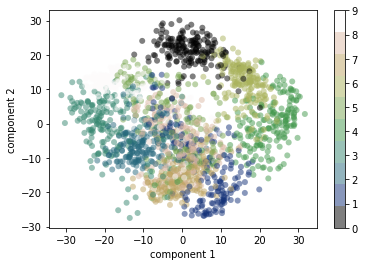

In [12]:
plt.scatter(projected[:, 0], projected[:, 1],
c=digits.target, edgecolor='none', alpha=0.5,
cmap=plt.cm.get_cmap('gist_earth', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();


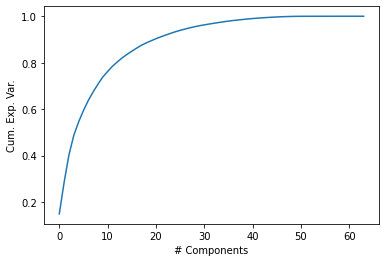

In [14]:
# Choosing Number of Components
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# Components')
plt.ylabel('Cum. Exp. Var.');

### PCA as Noise Filtering

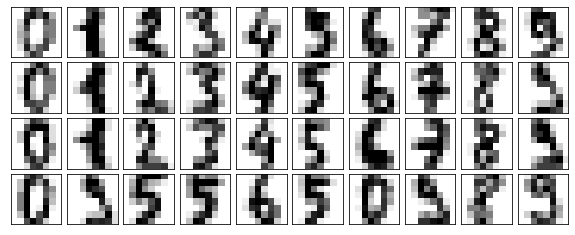

In [16]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
        subplot_kw={'xticks':[], 'yticks':[]},
        gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
         ax.imshow(data[i].reshape(8, 8),
             cmap='binary', interpolation='nearest',
             clim=(0, 16))
plot_digits(digits.data)

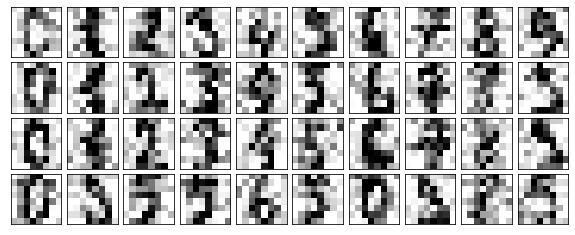

In [17]:
# Add noise
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [18]:
# Train PCA on noisy data:instructing it to preserve 50% of the variance

pca = PCA(0.50).fit(noisy)
pca.n_components_

12

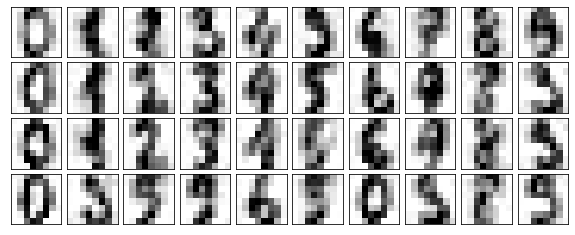

In [19]:
# Reconstruct filtered digits transformed via 12 PCs
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

This signal preserving/noise filtering property makes PCA a very useful feature selection routine — for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

#### Eigenfaces

In [21]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)


['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [22]:
pca = PCA(150)
pca.fit(faces.data)

PCA(n_components=150)

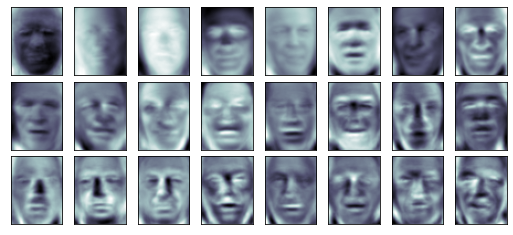

In [23]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

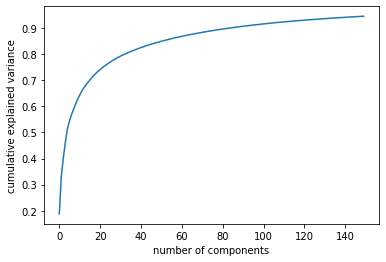

In [24]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

**The 150 Principal Components (Eigenfaces) collectively represent 90% of the variance/information in the full dataset**

#### Transform/Inverse Transform
* transform original dataset into PC composition
* inverse transform back to reconstruct the images
* see how similar they are after feature reduction

In [ ]:
# Compute the components and projected faces
pca = PCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

#### Side-by-side Comparison

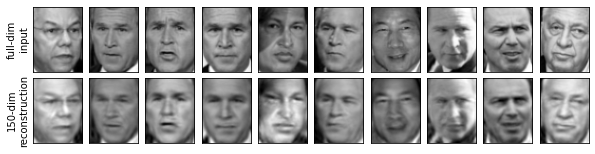

In [25]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                    subplot_kw={'xticks':[], 'yticks':[]},
                    gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')

ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

*This shows why SVM procedures that utilize PCA step first can be so effective*
 * We distilled the original dataset into 150 PCs and were still able to account for 90% of the variation and get pretty good fits to the actual faces